# Homework 2 - eCommerce analytics

*Authors:*
- _Tansel Simsek_
- _Andrea Carella_
- _Adrienn Timea Aszalos_

Date: 08.11.2020


## Introduction to the homework

<font size="2">E-commerce, also known as electronic commerce or internet commerce, refers to the buying and selling of goods or services using the internet, and the transfer of money and data to execute these transactions. The first e-commerce implementations date back to the 1990s and since then, millions of people every day visit some e-commerce sites to look for some product or service and, eventually, to purchase it.

You have been hired as a data scientist from a big multi-category online store. You and your team have been required to perform an analysis of the customer behavior in the store. Each row in the dataset represents an event, which catches different interactions (views, a product added/removed to/from the cart, purchases) of customers with your e-commerce. All events are related to products and users.

Your goal is to answer some research questions (RQs) that may help us discover and interpret meaningful patterns in data and eventually increase the number of sales.</font>

## Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gc # Garbage Collector

## Importing datasets

<font size="3">**NOTE!!!** 
    The _**category_code**_  and _**brand**_ columns of the dataset may have missing values.</font>

In [7]:
# Importing the file 2019-Oct.csv and converting the values of the column "event_time" from string to type datetime64

dataset = pd.read_csv('./data/2019-Oct.csv', 
                      header='infer', 
                      parse_dates=['event_time'],
                     date_parser=pd.to_datetime, nrows=1200000)

# Using this method in order to force the system to try to reclaim the maximum amount of available memory
gc.collect()

0

In [37]:
# Importing the file 2019-Nov.csv and converting the values of the column "event_time" from string to timestamp

dataset_nov = pd.read_csv('./data/2019-Nov.csv', 
                      header='infer', 
                      parse_dates=['event_time'],
                     date_parser=pd.to_datetime, nrows=1200000)

# Using this method in order to force the system to try to reclaim the maximum amount of available memory
gc.collect()

0

In [5]:
# Merging the two datasets into one single dataset and storing the final data into an existing variable in order 
# to use as little memory as possible
dataset = dataset.append(dataset_nov)

# Deleting the unused variable in order to free memory space
del dataset_nov

# Using this method in order to force the system to try to reclaim the maximum amount of available memory
gc.collect()

NameError: name 'dataset' is not defined

In [ ]:
# Storing the data into a pickle file in order to procees it more rapidly instead of processing the two csv files each time 
# we start the session in Jupiter
dataset.to_pickle("data/mergedata")

In [10]:
dataset = pd.read_pickle("data/mergedata")

## Let's visualize and know our dataset

Viewing the structure of the dataset

In [41]:
dataset.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


The columns of our dataset are the following:
- _event_time:_ Time when event happened at (in UTC).
- _event_type:_
    
    Events can be:

    - view - a user viewed a product
    - cart - a user added a product to shopping cart
    - removefromcart - a user removed a product from shopping cart
    - purchase - a user purchased a product

    Typical funnel: view => cart => purchase.
    

- _product_id:_ ID of a product
- _category_id:_ Product's category ID
- _category_code:_ Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories.
- _brand:_ Downcased string of brand name. Can be missed. 
- _price:_ Float price of a product. Present.
- _user_id:_ Permanent user ID.
- _user_session:_ Temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause.

**NOTE!!!** 
- The columns:
    - **_brand_**,
    - _**category_code**_ may **contain missing values**
- The value **_removefromcart_** of the column *event_type* **is missing**.

In [42]:
dataset.columns


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [206]:
print('The dataset is composed of ' + str(dataset.shape[0]) + ' rows and ' + str(dataset.shape[1]) + ' columns.')


The dataset is composed of 3600000 rows and 9 columns.


## Generating a descriptive statistics about the dataframe:

In [205]:
dataset.describe(datetime_is_numeric=True, include='all')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,3600000,3600000,3.600000e+06,3.600000e+06,2451772,3064189,3.600000e+06,3.600000e+06,3600000
unique,NaN,3,NaN,NaN,126,2984,NaN,NaN,537771
top,NaN,view,NaN,NaN,electronics.smartphone,samsung,NaN,NaN,4488e77a-9901-4c4b-b162-47a224ceab51
freq,NaN,3491503,NaN,NaN,969919,439716,NaN,NaN,1008
mean,2019-10-22 02:51:05.932886528+00:00,NaN,1.065531e+07,2.057230e+18,NaN,NaN,2.939980e+02,5.338908e+08,NaN
min,2019-10-01 00:00:00+00:00,NaN,1.000978e+06,2.053014e+18,NaN,NaN,0.000000e+00,2.449511e+08,NaN
25%,2019-10-01 15:55:43+00:00,NaN,1.005161e+06,2.053014e+18,NaN,NaN,6.819000e+01,5.158499e+08,NaN
50%,2019-11-01 06:45:50+00:00,NaN,5.100338e+06,2.053014e+18,NaN,NaN,1.689100e+02,5.295364e+08,NaN
75%,2019-11-01 12:41:07+00:00,NaN,1.640002e+07,2.053014e+18,NaN,NaN,3.621000e+02,5.518252e+08,NaN
max,2019-11-01 17:29:23+00:00,NaN,6.170001e+07,2.180737e+18,NaN,NaN,2.574070e+03,5.665404e+08,NaN


## Managing missing data values

In [208]:
print('There are ' + str(dataset['brand'].isnull().sum()) + ' rows that present missing values in the column brand.')

There are 535811 rows that present missing values in the column brand.


In [210]:
print('There are ' + str(dataset['category_code'].isnull().sum()) + ' rows that present missing values in the column category_code.')

There are 1148228 rows that present missing values in the column category_code.


In [216]:
print('The total number of the rows containing missing values is: ' + str(dataset.isnull().any(axis=1).sum()) + '.')


The total number of the rows containing missing values is: 1358093.


In [225]:
print('The percentage of missing value in the original dataset is: ' + str(round(dataset.isnull().any(axis=1).sum()/len(dataset),2)) + '%.')

The percentage of missing value in the original dataset is: 0.38%.


**Why did we chose to maintain the NaN values**

Since the less populated values are the ones of the attributes *category_code* and *brand* we opt to maintain the missing values (NaN) without replacing them or filling them with other values, because it doesn't make much sense to impute values for a category code or/and a brand name.

If we would have performed machine learning techniques then in that case we would have filled in the missing values.
Also we excluded the removal of the missing data because the percentage of it was very high (see cell above).

## Research questions

### [RQ1] 

**INTRO**

A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. 

### [RQ1.0] 
Which is the rate of complete funnels?


In [141]:
gc.collect()

# Group dataset by product_id, user_session and event_type and count the occurrences of each event type
completeFunnel = dataset.groupby(['product_id', 'user_session', 'event_type']).event_type.count()

# Convert obtained GroupBy Series into a Dataframe in order to rename the name of the column 
# containing the occurrences for each event type
completeFunnel = pd.DataFrame(completeFunnel).rename(columns={'event_type':'count'}).reset_index()

gc.collect()

# Group dataset by product_id and user_session and count the occurrences of each user session 
completeFunnel = completeFunnel.groupby(['product_id','user_session']).user_session.count()

# Convert obtained GroupBy Series into a Dataframe in order to rename the name of the column 
# containing the occurrences for each user session
completeFunnel = pd.DataFrame(completeFunnel).rename(columns={'user_session':'count'}).reset_index()

gc.collect()

# Total number of rows containing the occurrences of each user session
N = int(completeFunnel.shape[0])

# Number of all the rowss containing all the three steps (view, cart, purchase) per session
n = completeFunnel[completeFunnel['count'] == 3].shape[0]

# Calculate the rate of complete funnels 
completeFunnelRate = round(n*100/N)

print("The complete funnel rate is:", str(completeFunnelRate) + '%')

# Delete variable to free RAM
del completeFunnel

The complete funnel rate is: 1%


### [RQ1.1]

What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

From the plot we can deduce the following informations:

1. The most repetead operation is: view.
2. The average number of cart operations per session is: 0.19
3. The average number of purchase operations per session is: 0.22
4. The average number of view operations per session is: 13.36
5. The average number of removefromcart operations per session is: 0


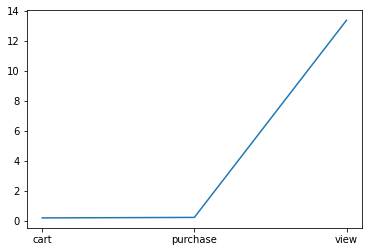

In [234]:
# Grouping the data by the event types and counting the number of occurrences for each event:
totalOperationsPerEventType = dataset.groupby('event_type').event_type.count()

# Converting the dataset into an array and dividing each element of the array by the total unique numbers of sessions
# in order to obtain the average number of operations per event type
averageNumberOfOperationsPerSession = totalOperationsPerEventType.to_numpy()/dataset_oct.user_session.nunique()

# Getting the unique names of the event types 
eventTypes = sorted(dataset.event_type.unique())

# Plotting the average number of times users perform each operation (view/removefromchart etc etc)
plt.plot(eventTypes,averageNumberOfOperationsPerSession)

print("From the plot we can deduce the following informations:" + '\n')
print("1. The most repetead operation is:", str(eventTypes[len(eventTypes)-1]) + ".")
print("2. The average number of cart operations per session is: " + str(round(averageNumberOfOperationsPerSession[0],2)))
print("3. The average number of purchase operations per session is: " + str(round(averageNumberOfOperationsPerSession[1],2)))
print("4. The average number of view operations per session is: " + str(round(averageNumberOfOperationsPerSession[2],2)))
print("5. The average number of removefromcart operations per session is: " + str(0))

### [RQ6.1] 
The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store? Find the overall conversion rate of your store.

In [49]:
# The following table shows how many times a product has been purchased.
purchasedProducts = pd.DataFrame(dataset[dataset.event_type == 'purchase'].groupby('product_id').product_id.count()).rename(columns={'product_id':'count purchases'}).reset_index()

# The following table shows how many times a product has been viewed.
viewedProducts = pd.DataFrame(dataset[dataset.event_type == 'view'].groupby('product_id').product_id.count()).rename(columns={'product_id':'count views'}).reset_index()

# Join on the two tables
mergedTable = purchasedProducts.join(viewedProducts.set_index('product_id'), on = 'product_id')

# Add a new column to the table and calculate the conversion rate for each product
mergedTable['conversion rate'] = mergedTable['count purchases']/mergedTable['count views']

# Calculate the overall conversion rate of the store
print('The overall conversion rate of the store is equal to: ' + str(round(mergedTable['conversion rate'].mean(),2)) + '%.')

#del purchasedProducts, viewedProducts, mergedTable

The overall conversion rate of the store is equal to: 0.07%.


### [RQ6.2] 
Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

In [153]:
# The following table shows how many times a product has been purchased for each category
gc.collect()
purchasedProducts = pd.DataFrame(dataset[dataset.event_type == 'purchase'].groupby('category_id').product_id.count()).rename(columns={'product_id':'count_purchases'}).reset_index()

# The following table shows how many times a product has been viewed for each category
viewedProducts = pd.DataFrame(dataset[dataset.event_type == 'view'].groupby('category_id').product_id.count()).rename(columns={'product_id':'count_views'}).reset_index()

# Join on the two tables
mergedTable = purchasedProducts.join(viewedProducts.set_index('category_id'), on = 'category_id')

# Add a new column to the table and calculate the conversion rate for each product category
mergedTable['conversion_rate'] = mergedTable['count_purchases']/mergedTable['count_views']
pd.options.display.float_format = '{:,.2f}'.format
mergedTable = mergedTable.sort_values(by = 'conversion_rate', ascending = False)
print('The number of purchases for each product category and the conversion rate for each product category in decreasing order can be viewed in the table below:')
mergedTable

The number of purchases for each product category and the conversion rate for each product category in decreasing order can be viewed in the table below:


,category_id,count_purchases,count_views,conversion_rate
419,2149484852091552186,8,106,0.08
319,2077453854185620383,10,180,0.06
369,2110937219005940617,1,19,0.05
431,2172371118332051820,4,79,0.05
137,2053013558618227283,23,521,0.04
...,...,...,...,...
179,2053013560623104713,1,887,0.00
118,2053013557955527211,1,980,0.00
208,2053013562116277013,1,1009,0.00
403,2137704926053138958,2,2124,0.00
